In [118]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [119]:
np.random.seed(0)

In [120]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # 60000 image (28 x 28 array)
print(X_test.shape) # 10000 image (28 x 28 array)
print(y_train.shape) # 60000 labels for 60000 images
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [121]:
# a code should be put in to debug before process lower codes
assert(X_train.shape[0] == y_train.shape[0]) # if the code does not meet the condition, it will return error and now execute anymore codes
assert(X_test.shape[0] == y_test.shape[0]) # The number of images must equals to number of labels.
assert(X_train.shape[1:] == (28, 28)) # image size must be 28 x 28
assert(X_test.shape[1:] == (28, 28)) 

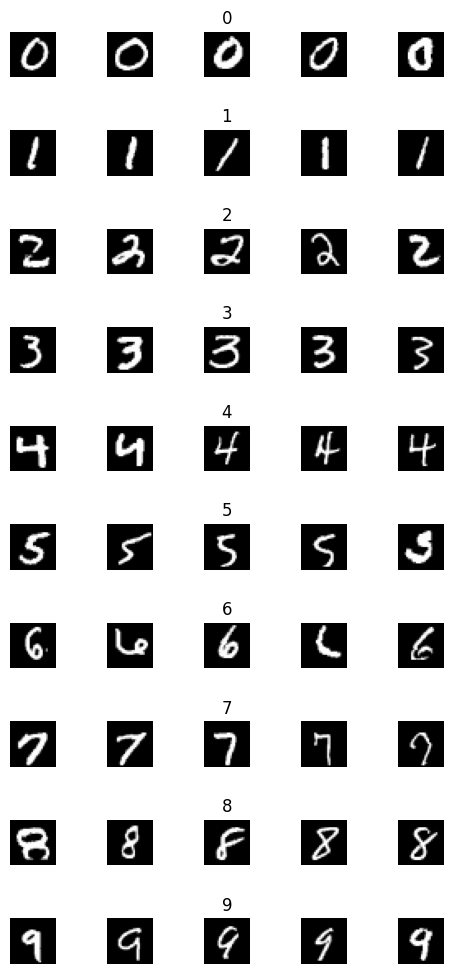

In [122]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(
    nrows = num_classes,
    ncols = cols,
    figsize = (5, 10)
)

fig.tight_layout()

for i in range(cols): 
    for j in range(num_classes): # j goes from 0 to 9
        x_selected = X_train[y_train == j] # only get images that has label of current j (0)
        
        # we have selected all the images of label j, but we only need one of them
        random_img_idx = random.randint(0, len(x_selected) - 1) # random image index

        currentSubPlot = axs[j][i] # j first then i since rows must come first in 2d array
        currentSubPlot.imshow(
            x_selected[
                random_img_idx, 
                :, : # keep the fullsize of the 2D array (image) currently: (28 x 28)
            ], 
            cmap=plt.get_cmap("gray") # since default cmap of plt is verderis
        )

        currentSubPlot.axis("off")

        # set title in the middle
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected)) # we only do this 1 time each rows when i = 2

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

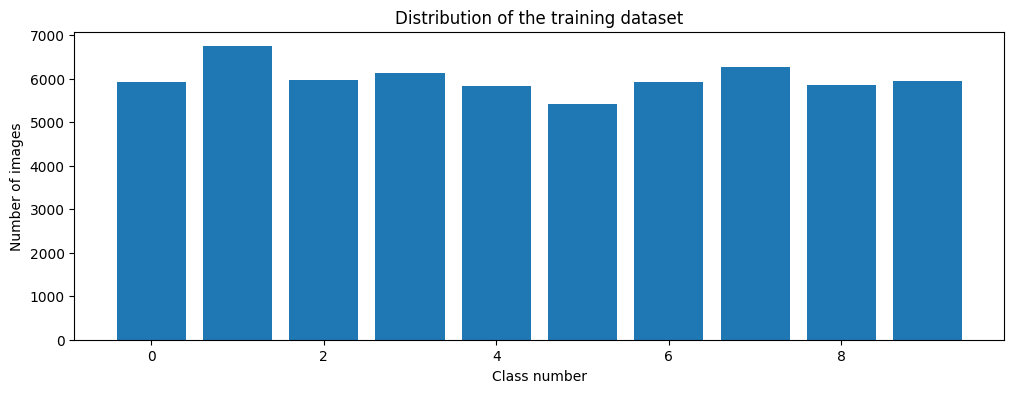

In [123]:
print(num_of_samples)
# as we can see, there are 5923 samples of label 0, 6742 samples of label 1, ....
# seeing just the numbers wont be enough, we need to visualize it

plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [124]:
# ------------- one hot encoding (for labels) ------------
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [125]:
# normalization the training set
# since we see that there are many black --> white image of numbers
# which range from 0 ---> 255, 
# but machine learning algo does not work well with such large numbers
# it works it 0 --> 1 ,, so that's why here's the step : 
# ------------ "Normalization" --------------------  
X_train = X_train/255
X_test = X_test/255

In [126]:
# before putting into a neural network
# we must FLATTEN THE IMAGES
# 2D 28x28 array of pixels --> 1D 784 array of pixels
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)

(60000, 784)


In [127]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu')) # hidden layer 1
    model.add(Dense(30, activation='relu')) # hidden layer 2
    model.add(Dense(10, activation='relu')) # hidden layer 3
    model.add(Dense(num_classes, activation='softmax')) # output layer
    model.compile(
        optimizer= Adam(lr=0.01), 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

In [128]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 dense_16 (Dense)            (None, 30)                330       
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


c:\Home\development\me-selflearn-machinelearning\machinelearningenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [129]:
history = model.fit(
    X_train, y_train, 
    validation_split=0.1, # 10% of the training datas is used to tune the hyper parameters (validation set) 
    epochs = 10, 
    batch_size = 200, 
    verbose = 1, 
    shuffle = 1
)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5657 - accuracy: 0.8190 - val_loss: 0.2605 - val_accuracy: 0.9237
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2939 - accuracy: 0.9139 - val_loss: 0.2134 - val_accuracy: 0.9363
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9212 - val_loss: 0.2223 - val_accuracy: 0.9350
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2585 - accuracy: 0.9234 - val_loss: 0.2150 - val_accuracy: 0.9380
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.9265 - val_loss: 0.2022 - val_accuracy: 0.9397
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2343 - accuracy: 0.9295 - val_loss: 0.2056 - val_accuracy: 0.9385
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2255 - accuracy: 0.9320 - val_loss: 0.2051 - val_accuracy: 0.9425
Epoch 

Text(0.5, 0, 'epoch')

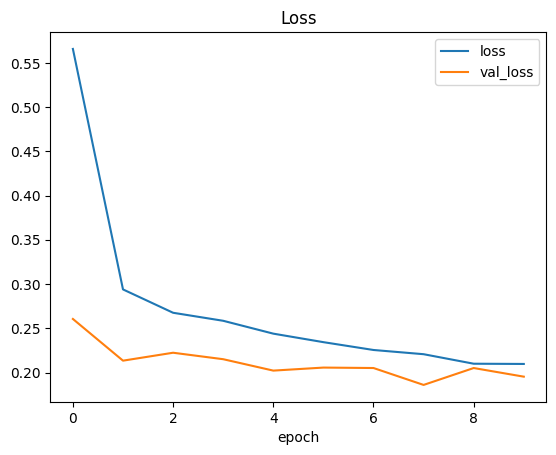

In [130]:
plt.plot(history.history['loss']) # loss / error
plt.plot(history.history['val_loss']) # validation loss / error
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [131]:
# we tried with 30 epoches, and this is what happened !!!
# the validation error is way larger the than training training error --> overfitting

Text(0.5, 0, 'epoch')

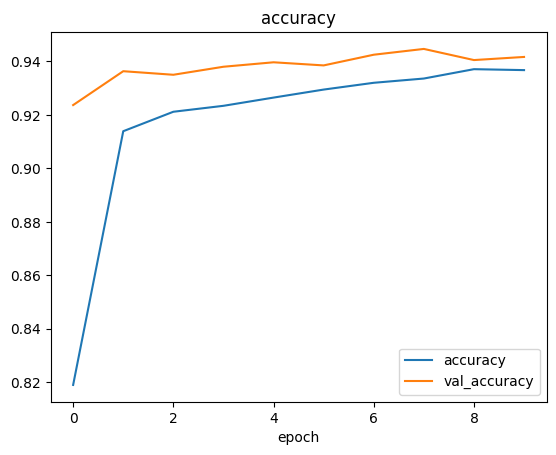

In [132]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [133]:
# and accuracy of validation starts to decrease because of overfitting

In [134]:
# the overfitting can occur when the model is too complex for the data, 
# too many nodes in a hidden layer --> perfectly seperate the datasets
# so it cannot generalize, to demonstrate this, change the nodes from 10 --> 784 in the hidden layers
# we actually just fintuning hyper parameters here !

In [135]:
# to display training score and accuracy (which was displayed on the graph above)
score = model.evaluate(X_test, y_test, verbose=0)
print('Train error (the score its self): ', score[0])
print('Train accuracy:', score[1])

Train error (the score its self):  0.24069631099700928
Train accuracy: 0.9319999814033508


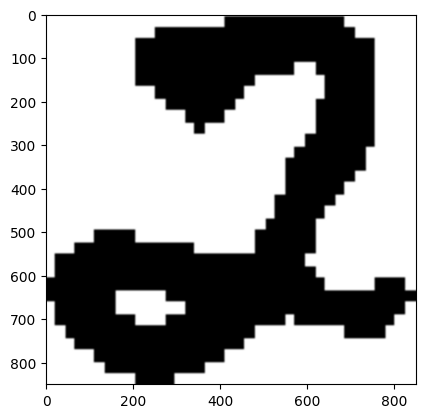

In [136]:
# get a random image file from interner for predicting 
import requests
from PIL import Image

# url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
# response = requests.get(url, stream=True)
# print(response)
# img = Image.open(response.raw)
# plt.imshow(img, cmap=plt.get_cmap('gray'))

img = Image.open('./tut5_mnist_datasets/Handwritten-digit-2.png')
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [137]:
img_array = np.asarray(img) # simply convert the input into an array
print(img_array.shape)

(850, 850, 4)


In [138]:
# --> need to convert it into 28x28 and only 1 channel
import cv2

resized = cv2.resize(img_array, (28, 28))
print(resized.shape)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)

(28, 28, 4)
(28, 28)


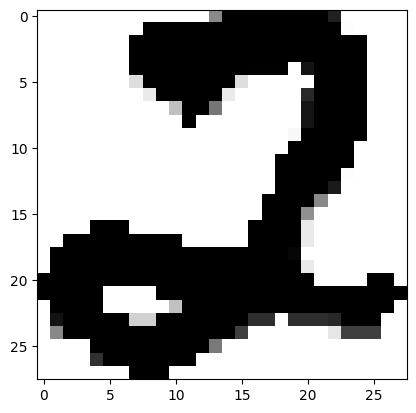

In [139]:
plt.imshow(gray_scale, cmap=plt.get_cmap('gray'))

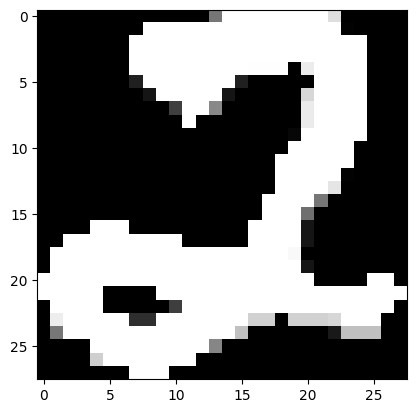

In [140]:
# but the neural network was trained on inputs that have black background and white lines (handraw)
# so we're gonna have to invert the colors too

image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [141]:
# before putting into the neural network

image = image/255 # normalization
image = image.reshape(1, 784) 
# flatten to --> [[flatten image]] so the "1" is needed here and neural network only accept [[input1], [input2], [input3]]

In [142]:
# for multi classes
def predict_classes (inputs, model):
    pred = model.predict(inputs) 
    return np.argmax(pred,axis=1) 

pred = predict_classes(image, model)
print('predicted digit: ', str(pred))

1/1 [==============================] - 0s 55ms/step
predicted digit:  [2]


In [143]:
# the prediction maybe wrong, right but the accuracy never get to 99%
# no matter how many attempts we try to tune the hyperparams (add layers, change units)
# because we just use the pure neural network
# these kinds of problems need CONVOLUTIONAL NEURAL NETWORK